[document](https://docs.google.com/document/d/1Qcz6Qm6XMvND9z1enjPBKrAdiXaXscTFEkByLHLMbN0/edit)

### Windows+Shift+S--> taking the screenshots

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#creating a new family column  in the data set by adding sibsp column and parch column
df['family']=df['SibSp']+df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [4]:
# Ticket --> As it is just a random number , we can skip this column from analysis

In [5]:
df.family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: family, dtype: float64

In [6]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
# Based on the categories,we will analyze which category which category people were more likely to survive
## low , mid , mid-high , high
df['Fare_Category'] = pd.cut(df.Fare,bins=[0,7.9,14.45,31.00,512],
                             labels = ['low' , 'mid ', 'mid-high' , 'high'])
df['Fare_Category'].head()
                         

0     low
1    high
2    mid 
3    high
4    mid 
Name: Fare_Category, dtype: category
Categories (4, object): [low < mid < mid-high < high]

In [8]:
#comparing fare with fare category
df[['Fare' , 'Fare_Category']]

,Fare,Fare_Category
0,7.2500,low
1,71.2833,high
2,7.9250,mid
3,53.1000,high
4,8.0500,mid
...,...,...
886,13.0000,mid
887,30.0000,mid-high
888,23.4500,mid-high
889,30.0000,mid-high


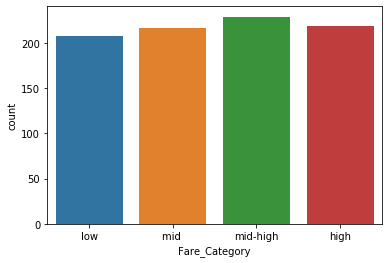

In [12]:
## visualize the fare category
## countplot give the entire count of a category --> categories of survived and deceased
sns.countplot(x='Fare_Category',data=df)

Text(0.5, 1.0, 'Survival based on Fare Category')

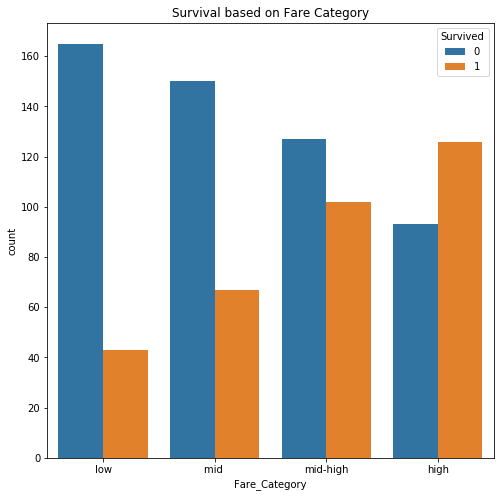

In [10]:
##Visualizing the count of categories based on survived
plt.figure(figsize=(8,8))
sns.countplot(x= 'Fare_Category',hue='Survived',data=df).\
             set_title('Survival based on Fare Category')

In [13]:
##Embarked : Port --> from which the passenger had boarded the ship
df.Embarked.value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# out of 100% passengers,which port has taken more %
df.Embarked.value_counts(normalize=True) 

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

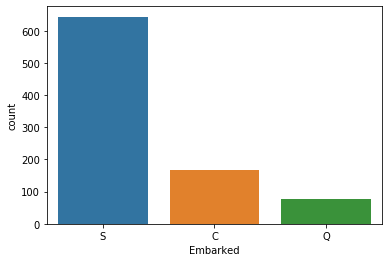

In [15]:
## Visualizing the port column
sns.countplot(x = 'Embarked',data=df)

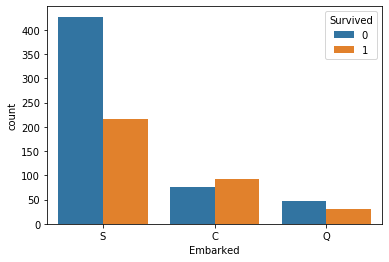

In [16]:
## Visualizing the port column
sns.countplot(x = 'Embarked',hue='Survived',data=df)

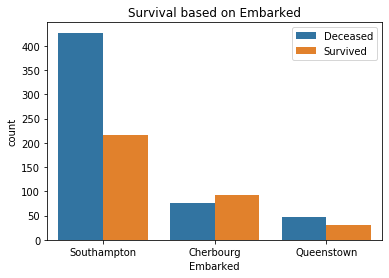

In [17]:
## Visualizing the port column
p = sns.countplot(x = 'Embarked',hue='Survived',data=df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
p.set_title('Survival based on Embarked')
p.legend(labels=['Deceased','Survived'])

In [18]:
## imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age-Range        0.198653
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [19]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [20]:
## cabin --> 77% missing values , we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [21]:
df.Cabin.isnull().sum()

0

In [22]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [23]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
# Median --> sorting in the order (middle value) NaN in the age column should be substituted with median of age
df.Age.fillna(df.Age.median,inplace=True)
df.Age.isnull().sum()

0

In [23]:
df.Embarked.mode()

0    S
dtype: object

In [24]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
## Imputing the Embarked column ---> Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [26]:
# imputing the fare category column
df.Fare_Category.isnull().sum()

18

In [27]:
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
family           0
Fare_Category    0
dtype: int64

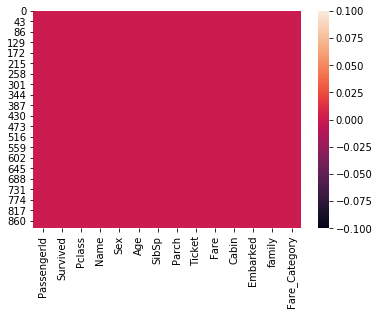

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S,1,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,high
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S,0,mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,high
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S,0,mid


In [10]:
df['Age-Range']=pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,high,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,high,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,mid,"(30, 40]"


In [24]:
# when we are creating dummy columns,we need to drop one dummy column --> it leads to a situation called as Dummy Variable Trap
dummy_set = pd.get_dummies(df.Fare_Category,drop_first=True) # n columns , we need to incluse upto n-1 dummy columns
dummy_set

,mid,mid-high,high
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
886,1,0,0
887,0,1,0
888,0,1,0
889,0,1,0


In [25]:
df = pd.concat([df,dummy_set],axis=1)

In [26]:
## Encoding of categorial variables/ Columns
df =  pd.concat([df, pd.get_dummies(df.Cabin,prefix='Cabin', drop_first=True),
                    pd.get_dummies(df.Embarked, prefix='Emb', drop_first=True), 
                    pd.get_dummies(df.Fare_Category, prefix='Fare', drop_first=True), 
                    pd.get_dummies(df['Age-Range'], drop_first=True)], axis=1 )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [ ]:
LabelEncoder ----> 0,1,2,3,4....(how many categories are present in the columns,that many numbers we will get)
OneHotEncoder -----> it will create dummy columns for each and every category

In [27]:
#Encoding the sex column with LabelEncoder
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head(1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,...,0,1,0,0,0,0,1,0,0,0


In [28]:
df.columns

Index([  'PassengerId',      'Survived',        'Pclass',          'Name',
                 'Sex',           'Age',         'SibSp',         'Parch',
              'Ticket',          'Fare',
       ...
               'Emb_Q',         'Emb_S',     'Fare_mid ', 'Fare_mid-high',
           'Fare_high',        (10, 20],        (20, 30],        (30, 40],
              (40, 60],        (60, 80]],
      dtype='object', length=175)

In [29]:
#drop the unnescessary columns
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_Category','Cabin','Age-Range'],
       axis=1,inplace=True)
df.shape

(891, 164)

In [30]:
df.head()

,Survived,Pclass,Sex,family,mid,mid-high,high,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [31]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
family      int64
mid         uint8
            ...  
(10, 20]    uint8
(20, 30]    uint8
(30, 40]    uint8
(40, 60]    uint8
(60, 80]    uint8
Length: 164, dtype: object

In [32]:
## StandardScaler -- not required for this (DistanceBased Algorithms)

In [33]:
## Seperating the Input and Output Data,drpping the survived column from the data
X = df.drop('Survived',axis=1)
X.shape

(891, 163)

In [34]:
## output column
y = df.iloc[:,0]
y.shape

(891,)

In [35]:
## Seperate the Input and Output into training data and testing data 
## Training --> we will be training the model on training data
## Testing --> check the performance of the model
## 891 --> out of 891 rows will be i training dataset and 25% of rows will 
          ## be in testing data

In [366]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=23) #random_state = to select the constant rows
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [367]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 163)
(223, 163)
(668,)
(223,)


In [368]:
X_train #input train

,Pclass,Sex,family,mid,mid-high,high,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
91,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
114,3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
657,3,0,2,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
778,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
146,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
488,3,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
40,3,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
742,1,0,4,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### 20 june 2020

document : [clickhere](https://docs.google.com/document/d/1F06Y821679OfJ45opgfPT56yiU4shnd0VTUfKgBKEpc/edit)

In [369]:
y_train #output of x_train
## Training dataset and testing --->100 rows in a dataset (out of 100,70 rows in training data-random,30 rows into test data)

91     0
114    0
657    0
778    0
146    1
      ..
31     1
488    0
40     0
742    1
595    0
Name: Survived, Length: 668, dtype: int64

In [370]:
X_test

,Pclass,Sex,family,mid,mid-high,high,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
727,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
668,3,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
210,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
654,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
228,2,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
341,1,0,5,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
421,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
434,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [371]:
y_test

727    1
668    0
210    0
654    0
228    0
      ..
152    0
341    1
421    0
434    0
889    1
Name: Survived, Length: 223, dtype: int64

In [372]:
## To check the default number of rows displayed
pd.get_option('display.max_rows')

60

In [373]:
## To display all the columns in the data frame, 
## we have to use set_option dislay.max_columns to be set to 
## None(None means unlimited) 
pd.set_option('display.max_columns',None) # In place of None if given as 50, it will display on the 50 columns

In [374]:
#reset to previous mode 
pd.reset_option('display.max_columns')

In [375]:
df

,Survived,Pclass,Sex,family,mid,mid-high,high,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


For Classification  we are classifying whether the passenger is survived or not
    Logistic Regression:

In [376]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for logistic regression

Dataset is of 100% - 891 rows
- 891 rows --- 2 parts
  - training data(subset of original data)(800 rows,we have in training data)
       - we will build the model on training data
  - testing data(subset of our riginal data)(91 rows,we will test the model performance on 91 rows)

In [377]:
## we have to apply this object(log_reg) to the training data
log_reg.fit(X_train,y_train)#with help of fit method we are fitting the 
                           ## Logistic Regression on training data
## objectName.fit(InputData,outputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Instead of directly predicting on test data , let us see how well the model predicts the training data

In [378]:
## predicting on the training data
## Syntax: ObjectName.predict(Input)
log_reg.predict(X_train)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [379]:
## Predicting on the training data
## Syntax: objectName.predict(TrainInput)
y_train_pred=log_reg.predict(X_train)

y_train -->original output 
y_train_pred-->model predicted output

In [380]:
y_train ==y_train_pred #comparing original data output and model predicted output

91      True
114    False
657    False
778     True
146    False
       ...  
31      True
488     True
40     False
742     True
595     True
Name: Survived, Length: 668, dtype: bool

In [383]:
## accuracy_score ---> with help of this metric,we can evaluate the overall
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.842814371257485

In [384]:
## Performance metrics ---> to evaluate the model is predicting

In [385]:
## predict the model on test :
y_test_pred = log_reg.predict(X_test)

In [386]:
y_test_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [387]:
y_test == y_test_pred

727     True
668     True
210     True
654    False
228     True
       ...  
152     True
341     True
421     True
434     True
889     True
Name: Survived, Length: 223, dtype: bool

In [388]:
## accuracy of the test data(Original test data output and the model predicted output)
accuracy_score(y_test,y_test_pred)

0.7757847533632287

In [251]:
## for training data -- we got an accuracy of 84%
## for testing data -- we got an accuracy of 77% 
## (Example : Instead of 77% if I got 34% as accuracy)